# Project 4: Wrangle and Analyze Data
Udacity Data Analyst Nanodegree <br> Jean Carlos da Cruz

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analysis">Analysis</a></li>    
</ul>

<a id='intro'></a>
## Introduction
> In this project we will gather and analyze data about Twitter account "WeRateDogs". For that, data will be gathered via manual download and programmatical download. After that we will assess this data, find possible issues on it and then clean these issues to get a smooth master dataframe to be used to deliver insights later.

In [ ]:
#Getting all the libraries we will need in this project
import requests
import json
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<a id='gather'></a>
## Gather

#### Data Gathering
1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced-2.csv)
File downloaded from Udacity repository.

2. Tweet image predictions (image_predictions-3.tsv)
File downloaded from request to Udacity URL repository.

3. Additional Twitter data (tweet_json.txt)
File downloaded from Udacity repository.

In [ ]:
#1. Getting WeRateDogs twitter archive
df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [ ]:
#2. Getting Tweet image predictions
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [ ]:
df_img = pd.read_csv("image_predictions.tsv", sep='\t')

In [ ]:
#3. Getting Additional Twitter data
#load the json data and store it in a list
data = []
with open('tweet-json.txt') as f:    
        for line in f:         
             data.append(json.loads(line))
#create dataframe from json data
df_api = pd.DataFrame(data)
#select columns of interest
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
df_api = df_api[columns_of_interest]

<a id='assess'></a>
## Assess

### Checking WeRateDogs twitter archive data

In [ ]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
# Checking the datatypes of the columns
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [ ]:
#Checking the dimensions of the dataframe
df.shape

(2356, 17)

In [ ]:
#Checking the number of unique values in each column
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [ ]:
#Checking for nulls in the dataset
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [ ]:
# check for duplicates in the data
df.duplicated().sum()

0

In [ ]:
#Checking infomation on datatypes of columns and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [ ]:
#Checking summary statistics
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
#Checking if there is tweets with no dog classification
df_dog_class=df.copy()
df_dog_class[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if
    (x[0] == "None" and x[1] == "None" and x[2] == "None" and x[3] =="None") 
    else False, axis = 1).value_counts()

True     1976
False     380
dtype: int64

In [ ]:
#Cheking the dogs names
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
Buddy           7
an              7
Bailey          7
Toby            7
Daisy           7
Koda            6
Milo            6
Leo             6
Oscar           6
Jax             6
Dave            6
Rusty           6
Scout           6
Bella           6
Stanley         6
Jack            6
Chester         5
             ... 
Jarvis          1
Gustaf          1
Brat            1
Christoper      1
Juckson         1
Willie          1
Tango           1
Timofy          1
Dylan           1
Brooks          1
Anna            1
Mary            1
River           1
Rey             1
Sailer          1
Rupert          1
Ridley          1
Staniel         1
Tayzie          1
Tedrick         1
Chase           1
Sojourner       1
Toffee          1
Cheesy          1
Darrel    

In [ ]:
#Cheking the rates numerators and denominators
df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [ ]:
#Cheking the rates numerators and denominators
df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [ ]:
#Cheking the tweets with low numerator rating like 4
pd.set_option('display.max_colwidth', -1)
print(df.query("rating_numerator == '4'").text)

883     This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
912     Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R  
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                            
1219    This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z   
1303    This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30
1459    This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vi

In [ ]:
#Cheking the tweets with low denominator rating like 2
pd.set_option('display.max_colwidth', -1)
print(df.query("rating_denominator == '2'").text)

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object


#### WeRateDogs twitter archive Assessing Summary
##### Quality
<ul>
<li> <code>tweet_id</code> is integer and should be str, since is a categorical information;</li> 
<li> <code>retweeted_status_timestamp</code> is object and should be  datetime;</li>
<li> Columns related to <code>reply</code> and <code>retweets</code> have lots of missing data and they should be removed;</li> <li> Not all tweets could be defined as doggo,floofer, pupper or puppo and all columns;</li> 
<li> <code>name</code> has values defined wrongly as "a", "an" and "None";</li>
<li> Only 17% of tweets have dog classification</li>
<li> Some of the ratings from both <code>rating_numerator</code> and <code>rating_denominator</code> are different from the original tweet</li></ul>

##### Tidiness
<ul>
<li> <code>doggo, floofer,pupper and puppo</code> should be in one column.</li> 

### Checking Tweet image predictions data

In [ ]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#Checking the dimensions of the dataframe
df_img.shape

(2075, 12)

In [ ]:
# Checking the datatypes of the columns
df_img.dtypes

tweet_id    int64  
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

In [ ]:
#Checking the dimensions of the dataframe
df_img.shape

(2075, 12)

In [ ]:
#Checking the number of unique values in each column
df_img.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

In [ ]:
#Checking for nulls in the dataset
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [ ]:
# check for duplicates in the data
df_img.duplicated().sum()

0

In [ ]:
#Checking infomation on datatypes of columns and missing values.
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
#Checking summary statistics
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
#Cheking if there is any duplicated tweet
df_img.jpg_url.value_counts()

https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                       

In [ ]:
#Checking if there is any predictions that are not dogs
df_img.query("p1_dog == False and p2_dog == False and p3_dog == False")

#### Tweet image predictions data Assessing Summary
##### Quality
<ul>
<li> <code>tweet_id</code> is integer and should be str, since is a categorical information;</li> 
<li> Data contains retweets since there is the same picture in different tweets;</li> 
<li> There are pictures in tweets that are not dogs;</li> 
<li> <code>p1,p2 and p3</code> show "_" instead of space in the names;</li>
<li> Predictions have inconsistent casing;</li></ul> 
    
##### Tidiness
<ul>
<li> the prediction and confidence columns should be reduced to two columns considering the one with the highest confidence (dog)</li> 

### Checking Additional Twitter data

In [ ]:
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [ ]:
#Checking the dimensions of the dataframe
df_api.shape

(2354, 3)

In [ ]:
# Checking the datatypes of the columns
df_api.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [ ]:
#Checking the number of unique values in each column
df_api.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [ ]:
#Checking for nulls in the dataset
df_api.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [ ]:
# check for duplicates in the data
df_api.duplicated().sum()

0

In [ ]:
#Checking infomation on datatypes of columns and missing values.
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [ ]:
#Checking summary statistics
df_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Additional Twitter data Assessing Summary
##### Quality
<ul>
<li> <code>tweet_id</code> is integer and should be str, since is a categorical information;</li> 

<a id='clean'></a>
## Data Cleaning

#### Cleaning Steps:
<ul>
<li> 1. Create one single source with all data combined;</li>
<li> 2. Remove tweets that are actually retweets;</li>     
<li> 3. Remove empty and unnecessary columns;</li>
<li> 4. Fix the wrong datatypes of the columns;</li>
<li> 5. Fix the wrong numerators and denominators;</li>
<li> 6. Remove the "None" out of the doggo, floofer, pupper and puppo column and combine them into one column;</li>
<li> 7. Remove the wrong names of name column;</li>
<li> 8. Reduce the prediction columns into two based on the highest confidence;</li>
<li> 9. Remove tweets where the prediction was not a dog;</li>
<li> 10. Fix the predictions that have inconsistent casing (mix of uppercase and lowercase);</li>
   

##### 1. Create one single source with all data combined

#### Define
As we have three different data sources it is best practice to combine them in one dataset that contains all relevant information


##### Code

In [ ]:
#Rename API id to tweet_id
df_api.rename(columns={"id": "tweet_id"}, inplace=True)

In [ ]:
#Joining Tweet data and API data
df_joined = pd.merge(df, df_api, on = "tweet_id", how = "outer")

In [ ]:
#Joining the first joined with df_img
df_joined = pd.merge(df_joined, df_img, on = "tweet_id", how = "outer")

##### Test

In [ ]:
df_joined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [ ]:
#Making a copy of the original dataset
df_clean=df_joined.copy()

##### 2. Remove tweets that are actually retweets

##### Define
Since we want to consider only tweets that are actually new tweets about dogs we need to remove the retweets from the dataset

##### Code

In [ ]:
#Removing tweets that are actually retweets (retweeted_status_id is not null)
df_clean = df_clean.query('retweeted_status_id == "NaN"')

##### Test

In [ ]:
df_clean.shape

(2175, 30)

##### 3. Remove empty and unnecessary columns

##### Define
We are not going to use all columns that we have available in the dataset. So it is best practive to remove unnecessary columns to remove noise from the dataset

##### Code

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 2175 non

In [ ]:
#Removing columns that won't be further used
df_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

In [ ]:
#Removing all rows that jpg_url are emply. It means we don't have any picture
df_clean.dropna(subset = ["jpg_url"], inplace = True)

##### Test

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-n

##### 4. Fix the wrong datatypes of the columns

##### Define
We have somen columsn with wrong datatypes in the original dataset. For example tweet_id is classified as integer and we know this is categorical information (Tweets unique identification). So we will be fixing those kind of errors in order to avoid problems in further analysis

##### Code

In [ ]:
#Converting the tweet_id from int to str
df_clean["tweet_id"] = df_clean["tweet_id"].astype("str")

In [ ]:
# Fixing the timestamp from object to datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [ ]:
#Converting retweet_count, favorite_count and img_num from float to int
for x in ["retweet_count", "favorite_count", "img_num"]:
    df_clean[x] = df_clean[x].astype("int64")

##### Test

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 no

##### 5. Fix the wrong numerators and denominators

##### Define
We identified some numerators and denominators that were wrongly extracted from the original text. So, the purpose here is to extract again the numerators and denominators using a regex function in order to get the most accurate numbers for our analysis

##### Code

In [ ]:
# Extracting new numerators and denominators from the tweet text using regex
df_clean[['new_numerator','new_denominator']] = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_numerator,new_denominator
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13,10
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13,10
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12,10
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13,10
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12,10


In [ ]:
#Converting the news columns to int
df_clean['new_numerator'] = pd.to_numeric(df_clean['new_numerator'])
df_clean['new_denominator'] = pd.to_numeric(df_clean['new_denominator'])

In [ ]:
# Checking rows where the new numerators doesn't match the old ones
with pd.option_context('display.max_colwidth', 280):
    print(df_clean.loc[~(df_clean['rating_numerator'] == df_clean['new_numerator'])][[
        'text', 'rating_numerator', 'new_numerator', 'rating_denominator', 'new_denominator']])

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  new_numerator  rating_denominator  new_denominator  
45                   5          13.50                  10          

In [ ]:
# Checking rows where the new denominator doesn't match the old ones
with pd.option_context('display.max_colwidth', 280):
    print(df_clean.loc[~(df_clean['rating_denominator'] == df_clean['new_denominator'])][[
        'text', 'rating_numerator', 'new_numerator', 'rating_denominator', 'new_denominator']])

Empty DataFrame
Columns: [text, rating_numerator, new_numerator, rating_denominator, new_denominator]
Index: []


In [ ]:
#Checking rows where the new_numerator and new_denominator are still different from text, because such tweets have multiple patterns from the rates
print(df_clean.text.str.count('(\d+(\.\d+)?\/\d+(\.\d+)?)')[df_clean.text.str.count('(\d+(\.\d+)?\/\d+(\.\d+)?)') != 1])

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1459    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [ ]:
#Getting the index of such rows
pattern_clean_index = df_clean.text.str.count('(\d+(\.\d+)?\/\d+(\.\d+)?)')[df_clean.text.str.count('(\d+(\.\d+)?\/\d+(\.\d+)?)') != 1].index
pattern_clean_index.shape[0]

27

In [ ]:
#Since there are only 27 rows we are going to remove them
df_clean.drop(pattern_clean_index, inplace = True)

In [ ]:
#Removing the onde denominators and numerators
df_clean.drop(["rating_numerator", "rating_denominator"], inplace=True, axis = 1)

##### Test

In [ ]:
df_clean

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_numerator,new_denominator
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13.0,10
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13.0,10
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,13.0,10
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofol

##### 6. Remove the "None" out of the doggo, floofer, pupper and puppo column and combine them into one column

##### Define
In the original dataset we have four columns for each dog class, also in each columns there is "None" informed as dog_class. In order to clean and organize our dataset we are goind to remove those "None" and combine all four columns in just one.

##### Code

In [ ]:
#Replacing "None" with "" in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    df_clean[x].replace("None", "", inplace = True)

In [ ]:
df_clean.shape

(1967, 25)

In [ ]:
#Concating the columns together
df_clean['dog_class'] = df_clean['doggo'].map(str) + df_clean['floofer'].map(str) + df_clean['pupper'].map(str) + df_clean['puppo'].map(str)
df_clean.dog_class.value_counts()

                1663
pupper          201 
doggo           63  
puppo           22  
doggopupper     9   
floofer         7   
doggofloofer    1   
doggopuppo      1   
Name: dog_class, dtype: int64

In [ ]:
df_clean.shape

(1967, 26)

In [ ]:
#Replacing "" to null
df_clean["dog_class"].replace("", np.nan, inplace = True)
df_clean.dog_class.value_counts()

pupper          201
doggo           63 
puppo           22 
doggopupper     9  
floofer         7  
doggofloofer    1  
doggopuppo      1  
Name: dog_class, dtype: int64

In [ ]:
#Getting the index of rows where we have two classifications
class_index = df_clean.query("dog_class == 'doggopupper' or dog_class == 'doggopuppo' or dog_class == 'doggofloofer'").index
class_index.shape[0]

11

In [ ]:
#Since there are only 17 rows we are going to remove them
df_clean.drop(class_index, inplace = True)

In [ ]:
df_clean.dog_class.value_counts()

pupper     201
doggo      63 
puppo      22 
floofer    7  
Name: dog_class, dtype: int64

In [ ]:
#Removing the old columns
df_clean.drop(['doggo', 'puppo', 'floofer', 'pupper'], inplace=True, axis = 1)

##### Test

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id           1956 non-null object
timestamp          1956 non-null datetime64[ns]
source             1956 non-null object
text               1956 non-null object
expanded_urls      1956 non-null object
name               1956 non-null object
retweet_count      1956 non-null int64
favorite_count     1956 non-null int64
jpg_url            1956 non-null object
img_num            1956 non-null int64
p1                 1956 non-null object
p1_conf            1956 non-null float64
p1_dog             1956 non-null object
p2                 1956 non-null object
p2_conf            1956 non-null float64
p2_dog             1956 non-null object
p3                 1956 non-null object
p3_conf            1956 non-null float64
p3_dog             1956 non-null object
new_numerator      1956 non-null float64
new_denominator    1956 non-null int64
dog_class          293 non-null object
dtypes

##### 7. Remove the wrong names from name column

##### Define
we identified some informations that are not real names like "a", "the" and "an". So the pupore here is to identify those errors and replace them with null information

##### Code

In [ ]:
#Cheking wrong names
df_clean.name.value_counts()

None           529
a              55 
Charlie        11 
Oliver         10 
Cooper         10 
Lucy           10 
Tucker         9  
Penny          9  
Sadie          8  
Winston        8  
Lola           7  
the            7  
Daisy          7  
Toby           7  
Jax            6  
Koda           6  
Stanley        6  
Bella          6  
Bo             6  
Scout          5  
Milo           5  
an             5  
Dave           5  
Leo            5  
Bailey         5  
Oscar          5  
Rusty          5  
Buddy          5  
Louis          5  
Chester        5  
              ..  
Pablo          1  
Shakespeare    1  
Fred           1  
Lambeau        1  
Willem         1  
Chase          1  
Tayzie         1  
Dylan          1  
Fizz           1  
Mo             1  
Snoop          1  
Quinn          1  
Keurig         1  
Sojourner      1  
Blitz          1  
Meyer          1  
Halo           1  
Eazy           1  
Timofy         1  
Staniel        1  
Brooks         1  
Anna        

In [ ]:
#Replacing the wrong names from name column
for x in ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']:
    df_clean["name"].replace(x, np.nan, inplace = True)

##### Test

In [ ]:
df_clean.name.value_counts()

Charlie        11
Lucy           10
Oliver         10
Cooper         10
Tucker         9 
Penny          9 
Winston        8 
Sadie          8 
Toby           7 
Lola           7 
Daisy          7 
Stanley        6 
Bella          6 
Bo             6 
Jax            6 
Koda           6 
Leo            5 
Milo           5 
Buddy          5 
Scout          5 
Chester        5 
Rusty          5 
Dave           5 
Bailey         5 
Oscar          5 
Louis          5 
George         4 
Bentley        4 
Brody          4 
Clark          4 
              .. 
Timmy          1 
Willie         1 
Pablo          1 
Shakespeare    1 
Fred           1 
Tayzie         1 
Staniel        1 
Aqua           1 
Eazy           1 
Freddery       1 
Mo             1 
Snoop          1 
Quinn          1 
Keurig         1 
Sojourner      1 
Blitz          1 
Meyer          1 
Halo           1 
Fizz           1 
Ridley         1 
Timofy         1 
Brooks         1 
Anna           1 
Mary           1 
actually  

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id           1956 non-null object
timestamp          1956 non-null datetime64[ns]
source             1956 non-null object
text               1956 non-null object
expanded_urls      1956 non-null object
name               1342 non-null object
retweet_count      1956 non-null int64
favorite_count     1956 non-null int64
jpg_url            1956 non-null object
img_num            1956 non-null int64
p1                 1956 non-null object
p1_conf            1956 non-null float64
p1_dog             1956 non-null object
p2                 1956 non-null object
p2_conf            1956 non-null float64
p2_dog             1956 non-null object
p3                 1956 non-null object
p3_conf            1956 non-null float64
p3_dog             1956 non-null object
new_numerator      1956 non-null float64
new_denominator    1956 non-null int64
dog_class          293 non-null object
dtypes

##### 8. Reduce the prediction columns into two based on the highest confidence;

##### Define
We had three breed predictions in the original dataset. For our analysis we are going to use just one. This one will be the one with the highest confidence. So, here we are goind to combine those information

##### Code

In [ ]:
#Extracting the highest prediction based on the highest confidence
def get_high(x):
    if x[0] >= x[1] and x[0] >= x[2]:
        return x[3]
    elif x[1] >= x[0] and x[1] >= x[2]:
        return x[4]
    elif x[2] >= x[0] and x[2] >= x[1]:
        return x[5]
df_clean["breed"] = df_clean[["p1_conf", "p2_conf", "p3_conf", "p1", "p2" , "p3"]].apply(get_high, axis = 1)
df_clean["conf"] = df_clean[["p1_conf", "p2_conf", "p3_conf", "p1_conf", "p2_conf" , "p3_conf"]].apply(get_high, axis = 1)
df_clean["check_dog"] = df_clean[["p1_conf", "p2_conf", "p3_conf", "p1_dog", "p2_dog" , "p3_dog"]].apply(get_high, axis = 1)
    

In [ ]:
df_clean.iloc[:, 10:].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_numerator,new_denominator,dog_class,breed,conf,check_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10,NaN,orange,0.097049,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10,NaN,Chihuahua,0.323581,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10,NaN,Chihuahua,0.716012,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10,NaN,paper_towel,0.170278,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10,NaN,basset,0.555712,True


In [ ]:
#Dropping the old columns
df_clean.drop(['p1' , 'p1_conf' , 'p1_dog' , 'p2' , 'p2_conf' , 'p2_dog' , 'p3' , 'p3_conf' , 'p3_dog'], inplace = True, axis = 1)

##### Test


In [ ]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,new_numerator,new_denominator,dog_class,breed,conf,check_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,13.0,10,NaN,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,13.0,10,NaN,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,12.0,10,NaN,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,13.0,10,NaN,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,12.0,10,NaN,basset,0.555712,True


##### 9. Remove tweets where the prediction was not a dog;

##### Define
Since the breed information came from a prediction generated by a model. There is some flaws. Like predictions that are not even a dog. So we are goind to remove those wrond predictions

##### Code

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id           1956 non-null object
timestamp          1956 non-null datetime64[ns]
source             1956 non-null object
text               1956 non-null object
expanded_urls      1956 non-null object
name               1342 non-null object
retweet_count      1956 non-null int64
favorite_count     1956 non-null int64
jpg_url            1956 non-null object
img_num            1956 non-null int64
new_numerator      1956 non-null float64
new_denominator    1956 non-null int64
dog_class          293 non-null object
breed              1956 non-null object
conf               1956 non-null float64
check_dog          1956 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 246.4+ KB


In [ ]:
#Removing the wrong predictions
df_clean = df_clean.query('check_dog == True')

##### Test

In [ ]:
df_clean.shape

(1443, 16)

##### 10. Fix the predictions that have inconsistent casing (mix of uppercase and lowercase);

##### Define
Some predictions are stated in uppercase and others in lowercase and some of them with backspace and others with underline. It is best practice to format then all equal.

##### Code

In [ ]:
#Replacing "_" with " "
df_clean.breed = df_clean.breed.str.replace("_", " ")
df_clean.breed

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


1       Chihuahua                  
2       Chihuahua                  
4       basset                     
5       Chesapeake Bay retriever   
6       Appenzeller                
7       Pomeranian                 
8       Irish terrier              
9       Pembroke                   
10      Samoyed                    
11      French bulldog             
12      Pembroke                   
13      French bulldog             
14      golden retriever           
15      whippet                    
16      golden retriever           
17      golden retriever           
18      Siberian husky             
20      French bulldog             
21      basset                     
23      Pembroke                   
24      Mexican hairless           
25      Samoyed                    
26      Chihuahua                  
27      kuvasz                     
29      French bulldog             
31      pug                        
33      Blenheim spaniel           
34      pug                 

In [ ]:
#Lowering the strings
df_clean.breed = df_clean.breed.str.lower()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


##### Test

In [ ]:
df_clean.breed.value_counts()

golden retriever               133
labrador retriever             93 
pembroke                       87 
chihuahua                      77 
pug                            54 
chow                           41 
samoyed                        40 
toy poodle                     38 
pomeranian                     36 
malamute                       29 
french bulldog                 26 
cocker spaniel                 26 
chesapeake bay retriever       22 
miniature pinscher             22 
german shepherd                20 
staffordshire bullterrier      19 
siberian husky                 19 
shetland sheepdog              18 
eskimo dog                     18 
maltese dog                    17 
beagle                         17 
rottweiler                     17 
cardigan                       17 
shih-tzu                       17 
kuvasz                         16 
italian greyhound              16 
lakeland terrier               15 
west highland white terrier    14 
great pyrenees      

In [ ]:
#Resetting index to match with the real amount of rows
df_clean.reset_index(drop = True, inplace = True)

In [ ]:
#Saving the cleaned data into a new csv file
df_clean.to_csv('twitter_archive_master.csv', index = False)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 16 columns):
tweet_id           1443 non-null object
timestamp          1443 non-null datetime64[ns]
source             1443 non-null object
text               1443 non-null object
expanded_urls      1443 non-null object
name               1035 non-null object
retweet_count      1443 non-null int64
favorite_count     1443 non-null int64
jpg_url            1443 non-null object
img_num            1443 non-null int64
new_numerator      1443 non-null float64
new_denominator    1443 non-null int64
dog_class          216 non-null object
breed              1443 non-null object
conf               1443 non-null float64
check_dog          1443 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 170.6+ KB


<a id='analysis'></a>
## Analysis

#### Questions:
<ul>
<li> 1. How has the number of favorites and retweets changed over time?;</li>
<li> 2. What is the more popular Dog Class name?;</li>     
<li> 3. What is the #top10 breeds by ratings?;</li>     
<li> 4. Is there a day of the week with more tweets?;</li>
<li> 5. Who are the top#5 tweets by rating?</li>

In [ ]:
#Reading from the masterfile
df_analysis = pd.read_csv('twitter_archive_master.csv')

In [ ]:
df_analysis.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,new_numerator,new_denominator,dog_class,breed,conf,check_dog
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,13.0,10,NaN,chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,12.0,10,NaN,chihuahua,0.716012,True
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,12.0,10,NaN,basset,0.555712,True
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,13.0,10,NaN,chesapeake bay retriever,0.425595,True
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,13.0,10,NaN,appenzeller,0.341703,True


##### 1. How has the number of favorites and retweets changed over time?

In [ ]:
#Creating columns for year and month then concatenate them
df_analysis['year'] = pd.DatetimeIndex(df_analysis['timestamp']).year
df_analysis['month'] = pd.DatetimeIndex(df_analysis['timestamp']).month
df_analysis['month'] = df_analysis.month.map("{:02}".format)
df_analysis['year'] = df_analysis['year'].astype(str)
df_analysis['month'] = df_analysis['month'].astype(str)
df_analysis['year-month'] = df_analysis[['year' , 'month']].agg('-'.join, axis=1)

In [ ]:
#Grouping the favorites and retweets by year-month
favorite_year_month = df_analysis.groupby('year-month', as_index=False)['favorite_count'].sum()
retweet_year_month = df_analysis.groupby('year-month', as_index=False)['retweet_count'].sum()

In [ ]:
#Joining favorite and retweets in the same dataframe
favorite_retweet_year_month = pd.merge(favorite_year_month, retweet_year_month, on = "year-month", how = "inner")
favorite_retweet_year_month

,year-month,favorite_count,retweet_count
0,2015-11,232707,91672
1,2015-12,780499,327580
2,2016-01,452071,162027
3,2016-02,340714,123350
4,2016-03,408723,139692
5,2016-04,205721,70726
6,2016-05,204108,69410
7,2016-06,590717,266462
8,2016-07,447836,152916
9,2016-08,424180,137786


In [ ]:
#Updating seaborn
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.1)


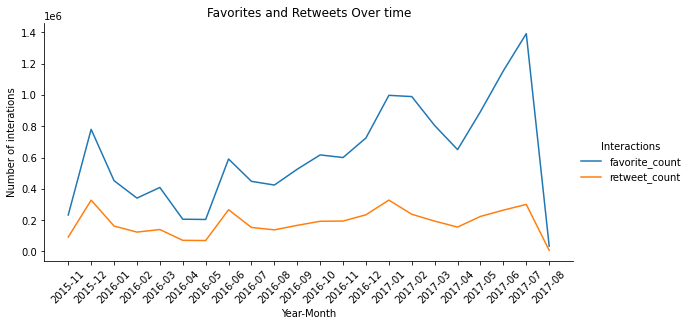

In [ ]:
#Creating line chart
favorite_retweet_year_month_melted = favorite_retweet_year_month.melt("year-month",var_name="Interactions",value_name="count")
ax = sns.relplot(data = favorite_retweet_year_month_melted, x='year-month', y='count' , hue='Interactions',kind='line', height=4, aspect=2)
ax.set(title='Favorites and Retweets Over time', xlabel='Year-Month', ylabel='Number of interations')
ax.set_xticklabels(rotation=45)
plt.show()

In [ ]:
#checking the last day of data
max(df_analysis.timestamp)

'2017-08-01 00:17:27'

The number of favorites growed higher than the number of retweets over time. Numbers from 2017 August are pretty low because we only have one day of data collected for that month.

##### 2. What is the more popular Dog Class name?

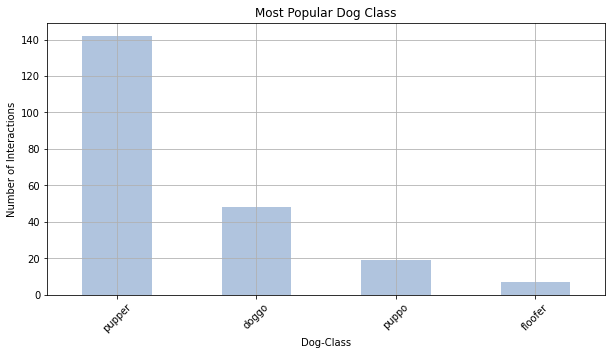

In [ ]:
#Creating bar chart
fig, ax = plt.subplots(figsize = (10,5))
df_analysis.dog_class.value_counts().sort_values(ascending=False).plot.bar(color='lightsteelblue')
plt.xlabel('Dog-Class')
plt.xticks(rotation=45)
plt.ylabel('Number of Interactions')
plt.title('Most Popular Dog Class')
plt.grid(b=None)
plt.show()

Pupper is the most popular Dog Class in the dataset

##### 3. What is the #top10 breeds by ratings?

In [ ]:
#To Define the rate we will use Numerator/Denominator
df_analysis['rating'] = df_analysis['new_numerator']/df_analysis['new_denominator']

In [ ]:
#Grouping average ratings by breed
rating_by_breed = df_analysis.groupby('breed', as_index=False)['rating'].mean()

In [ ]:
#Getting the top#10 breeds by rating
rating_by_breed_top10 = rating_by_breed.sort_values(by=['rating'], ascending=False).head(10)

In [ ]:
rating_by_breed_top10

,breed,rating
4,australian terrier,1.300000
85,saluki,1.250000
20,briard,1.233333
99,tibetan mastiff,1.225000
15,border terrier,1.214286
43,giant schnauzer,1.200000
93,silky terrier,1.200000
97,standard schnauzer,1.200000
44,golden retriever,1.180290
38,eskimo dog,1.177778


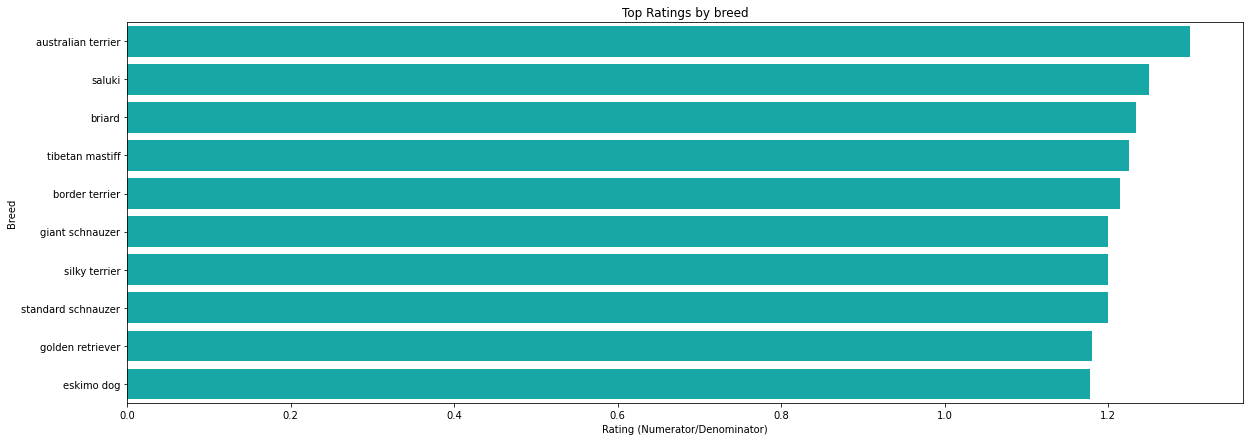

In [ ]:
# Creating a bar chart 
f,ax = plt.subplots(figsize=(20, 7))
sns.barplot(x='rating', y='breed' , data=rating_by_breed_top10, color='c')
ax.set(title='Top Ratings by breed', xlabel='Rating (Numerator/Denominator)', ylabel="Breed")
plt.show()

So the top#10 breeds by rating are:
Australian Terrier, Saluki, Briard, Tibetan Mastiff, Border Terrier, Giant Schnauzer, Silky Terrier, Standard Schnauzer, Golden Retriever and Eskimo Dog

#####  4. Is there a day of the week with more tweets?

In [ ]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 20 columns):
tweet_id           1443 non-null int64
timestamp          1443 non-null object
source             1443 non-null object
text               1443 non-null object
expanded_urls      1443 non-null object
name               1035 non-null object
retweet_count      1443 non-null int64
favorite_count     1443 non-null int64
jpg_url            1443 non-null object
img_num            1443 non-null int64
new_numerator      1443 non-null float64
new_denominator    1443 non-null int64
dog_class          216 non-null object
breed              1443 non-null object
conf               1443 non-null float64
check_dog          1443 non-null bool
year               1443 non-null object
month              1443 non-null object
year-month         1443 non-null object
rating             1443 non-null float64
dtypes: bool(1), float64(3), int64(5), object(11)
memory usage: 215.7+ KB


In [ ]:
#Getting the weekday from the timestamp in the dataset
import datetime as dt
df_analysis['timestamp'] = pd.to_datetime(df_analysis['timestamp'])
df_analysis['weekday'] = df_analysis['timestamp'].dt.dayofweek

In [ ]:
#Creating a new column to make dayofweek String
df_analysis['weekday_str'] = df_analysis['timestamp'].dt.weekday_name 

In [ ]:
df_analysis.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,...,dog_class,breed,conf,check_dog,year,month,year-month,rating,weekday,weekday_str
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,NaN,chihuahua,0.323581,True,2017,08,2017-08,1.3,1,Tuesday
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,NaN,chihuahua,0.716012,True,2017,07,2017-07,1.2,0,Monday
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,NaN,basset,0.555712,True,2017,07,2017-07,1.2,5,Saturday
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,NaN,chesapeake bay retriever,0.425595,True,2017,07,2017-07,1.3,5,Saturday
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,NaN,appenzeller,0.341703,True,2017,07,2017-07,1.3,4,Friday


In [ ]:
#Grouping tweets by day of week
tweets_by_day = df_analysis.groupby('weekday_str', as_index=False)['tweet_id'].count()

In [ ]:
tweets_by_day_sorted = tweets_by_day.sort_values(by=['tweet_id'], ascending=False)

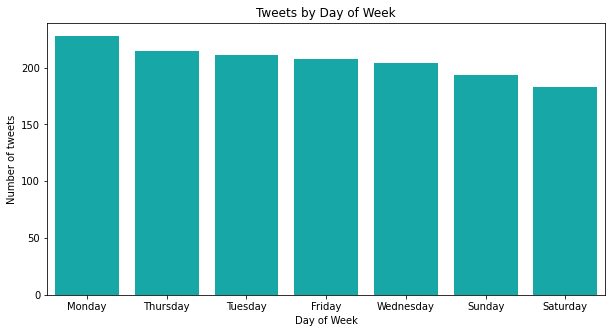

In [ ]:
# Creating a bar chart 
f,ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='weekday_str', y='tweet_id' , data=tweets_by_day_sorted, color='c')
ax.set(title='Tweets by Day of Week', xlabel='Day of Week', ylabel="Number of tweets")
plt.show()

It doesn't seem there is a favorite day of the week to tweet about WeRateDogs. All days looks have similar number of tweets. Altough, weekends are the only days when the number of tweets were below 200. It seens people prefer to rate dogs on weekdays =)

#####  5. Who are the top#5 tweets by rating?

In [ ]:
#Getting the top#5 tweets
df_top5_tweets = df_analysis.sort_values(by='rating', ascending=False).head(5)
df_top5_tweets

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,...,dog_class,breed,conf,check_dog,year,month,year-month,rating,weekday,weekday_str
309,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",Sam,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,...,NaN,golden retriever,0.871342,True,2016,12,2016-12,3.428571,0,Monday
256,821407182352777218,2017-01-17 17:21:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sundance. He's a doggo drummer. Even sings a bit on the side. 14/10 entertained af (vid by @sweetsundance) https://t.co/Xn5AQtiqzG,https://twitter.com/dog_rates/status/821407182352777218/video/1,Sundance,5053,13075,https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg,1,...,doggo,irish setter,0.505496,True,2017,01,2017-01,1.400000,1,Tuesday
291,813812741911748608,2016-12-27 18:24:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg","https://twitter.com/dog_rates/status/813812741911748608/photo/1,https://twitter.com/dog_rates/status/813812741911748608/photo/1,https://twitter.com/dog_rates/status/813812741911748608/photo/1",Gary,16267,40402,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,...,NaN,french bulldog,0.709146,True,2016,12,2016-12,1.400000,1,Tuesday
104,863079547188785154,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,NaN,1195,9094,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,...,NaN,lakeland terrier,0.275242,True,2017,05,2017-05,1.400000,4,Friday
221,828650029636317184,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK","https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",NaN,1544,10467,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,...,NaN,golden retriever,0.649209,True,2017,02,2017-02,1.400000,0,Monday


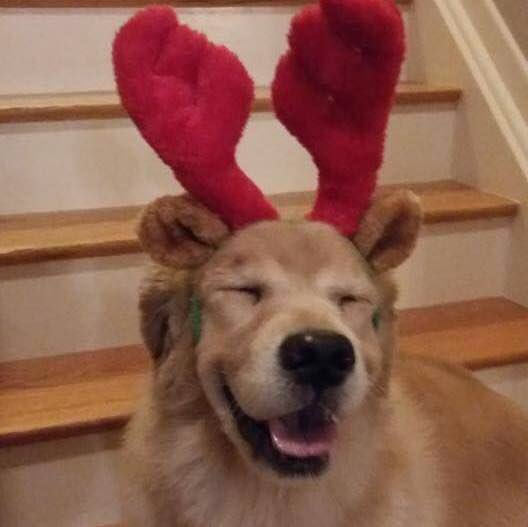

golden retriever 
favorite_count:  5927 
retweet_count:  1655 
rating:  3.4285714285714284  ( 24.0 / 7 )


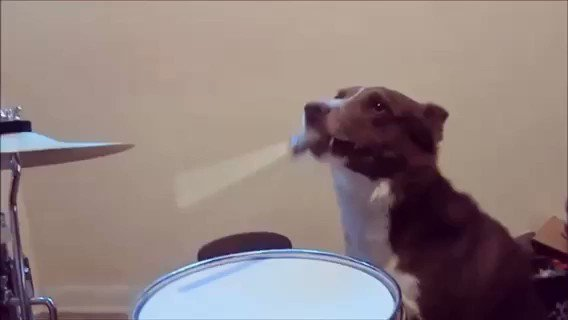

irish setter 
favorite_count:  13075 
retweet_count:  5053 
rating:  1.4  ( 14.0 / 10 )


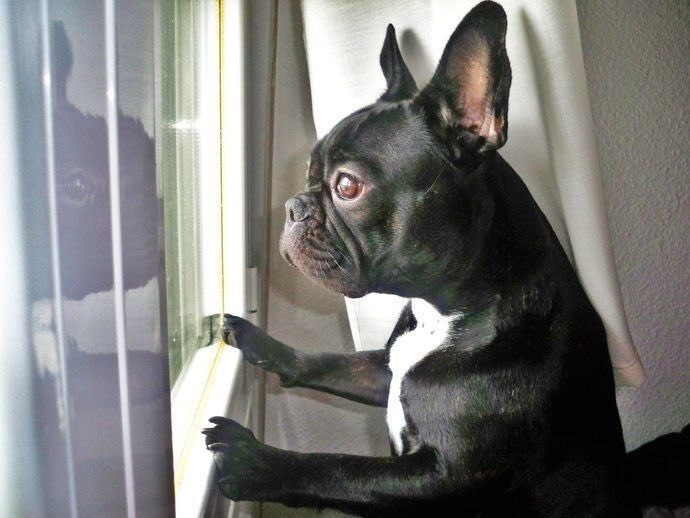

french bulldog 
favorite_count:  40402 
retweet_count:  16267 
rating:  1.4  ( 14.0 / 10 )


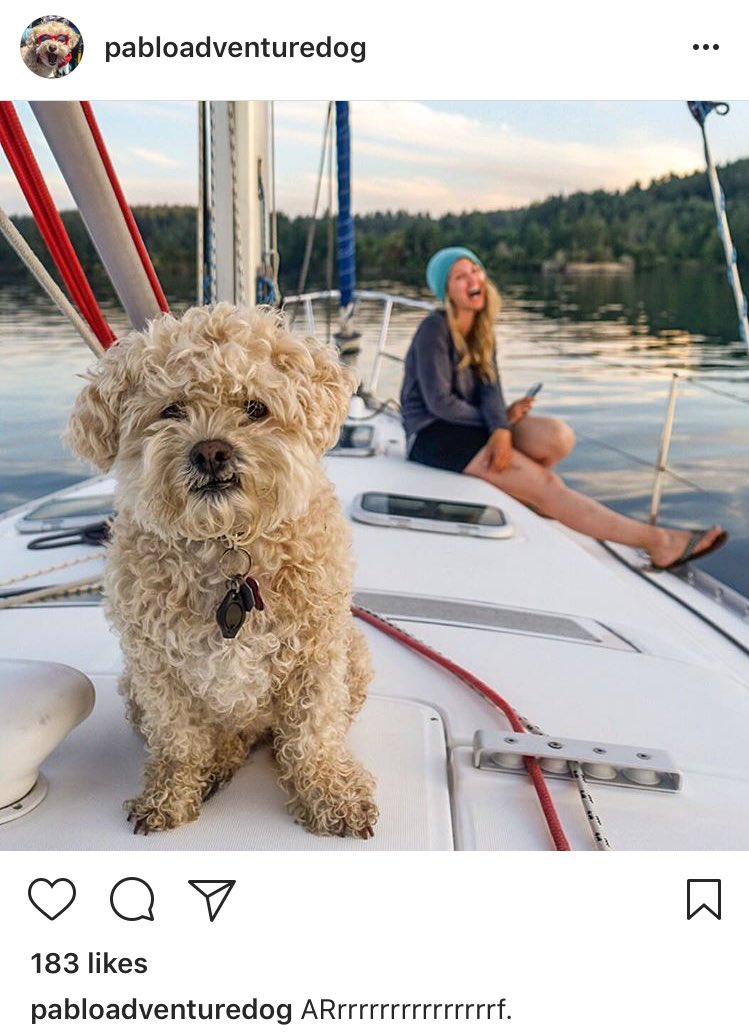

lakeland terrier 
favorite_count:  9094 
retweet_count:  1195 
rating:  1.4  ( 14.0 / 10 )


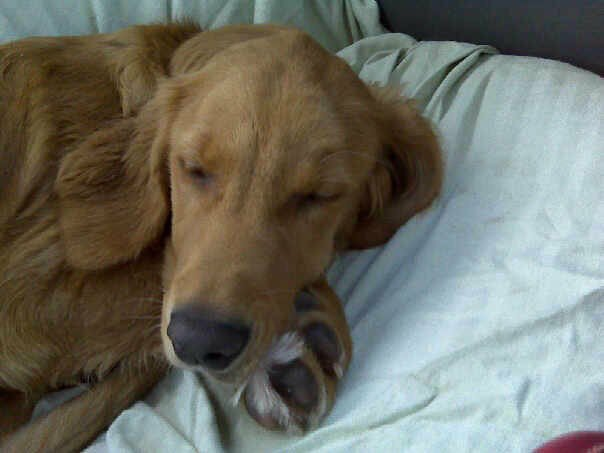

golden retriever 
favorite_count:  10467 
retweet_count:  1544 
rating:  1.4  ( 14.0 / 10 )


In [ ]:
#Getting the breed,favorite count, retweet count and rating (Numerator/Denominator)
from IPython.display import Image
from IPython.display import display
for i, j in df_top5_tweets.iterrows():
    img = Image(url=j['jpg_url'], format='jpg', width=200, embed=True)
    display(img)
    print(j['breed'], "\nfavorite_count: ", j['favorite_count'], "\nretweet_count: ",
          j['retweet_count'],  "\nrating: ", j['rating'],
          " (", j['new_numerator'], "/",
          j['new_denominator'], ")")